In [1]:
import pandas as pd
import op
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime

In [12]:
data=op.getting_files()
data= list(data)
l=len(data)

In [13]:
for i in tqdm(range(l)):
    f=data[i]
    df1=pd.read_excel(f,names=['Date','Time','Vd','Id','Temp6','Temp7','Temp9','Temp11'])

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:27<00:00, 27.66s/it]


In [27]:
df3.head()

,date,Vd,Id,Temp6,Vd_corr,Vd_corr_%change,avg_Vd_corr%change
0,2020-11-11 20:23:20,37.1677,0.5985,72.033723,36.396468,0.000000,NaN
1,2020-11-11 20:23:25,37.1491,0.5984,72.100235,36.395161,-0.003591,NaN
2,2020-11-11 20:23:30,37.1380,0.5986,72.176189,36.403809,0.023762,NaN
3,2020-11-11 20:23:35,37.1278,0.5985,72.242536,36.410859,0.019367,NaN
4,2020-11-11 20:23:40,37.1171,0.5988,72.298704,36.414763,0.010721,NaN


In [15]:
df2=df1.iloc[:,0:5]

In [16]:
'''filtering the data'''
df2['Temp6'] = df2['Temp6'].astype(float)
df2=df2[(df2['Temp6']<78) & (df2['Temp6']>72)]      # temperature filter
df2=df2[df2['Id']>0.5]                              # current filter

In [17]:
df2.dropna(inplace=True)

In [18]:
'''making datetime index'''
df2.index = pd.to_datetime(df2['Date'].astype(str)+' '+df2['Time'].astype(str),format='%Y%m%d %H:%M:%S')
df2.drop(['Date','Time'],axis=1,inplace=True)

In [19]:
'''Adding Temperature corrected voltage(Vd_corr)'''
df2['Vd_corr']=(-0.26)*(75-df2['Temp6'])+df2['Vd']

In [20]:
'''Adding %change in Vd_corr''' 
df2['Vd_corr_%change']=0
for i in tqdm(range(len(df2))):
    if i==0:
        df2.iloc[i,4]=0
    else:
        df2.iloc[i,4]=100*(df2['Vd_corr'][i]-df2['Vd_corr'][i-1])/(df2['Vd_corr'][i-1])

100%|████████████████████████████████████████████████████████████████████████| 127993/127993 [00:37<00:00, 3377.77it/s]


In [21]:
df3 = df2.copy()
df3=df3.resample('5S').mean()
df3.dropna(inplace=True)
df3.reset_index(inplace=True)
df3.rename(columns={'index':'date'},inplace=True)
# df3['date']=df3['date'].astype(str)

In [22]:
df3['avg_Vd_corr%change']=df3.iloc[:,5].rolling(window=720).mean()

In [26]:
df3=df3[df3['Vd_corr_%change']>-1.0]

In [23]:
df3.to_excel('letid_data_mod88_filtered.xlsx')

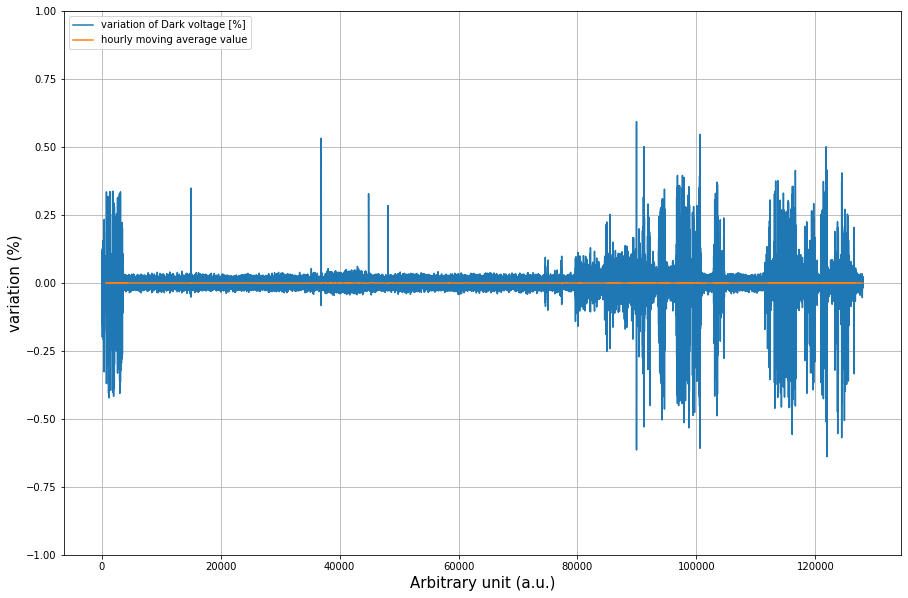

In [35]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df3['Vd_corr_%change'],label='variation of Dark voltage [%]')
plt.plot(df3['avg_Vd_corr%change'],label='hourly moving average value')
plt.legend(loc=2)
plt.xlabel('Arbitrary unit (a.u.)',fontsize=15)
plt.ylabel('variation (%)',fontsize=15)
plt.ylim(-1,1)
plt.savefig('Module_88 Letid diagram.jpeg')
plt.show()

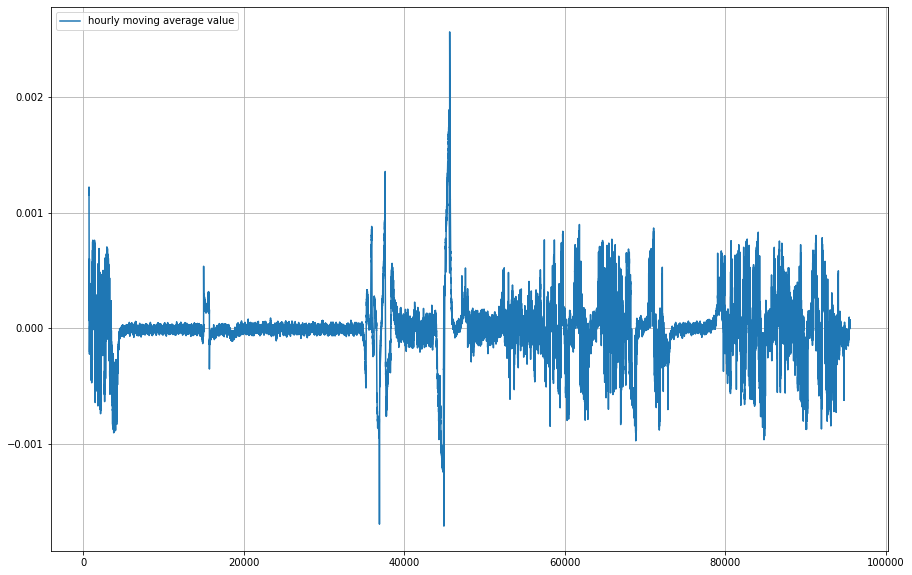